In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_curve,precision_score,recall_score,f1_score,accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("star_dataset.csv")

In [3]:
x = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']].values
scaler = StandardScaler()    #scaling the values in the column
scaler.fit(x)
x = scaler.transform(x)

label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])
y = df['class'].values

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state= 42)

In [5]:
def metric(y_test,y_pred):
    print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")
    print(f"Confusion matrix: {confusion_matrix(y_test,y_pred)}")
    print(f"Classification report: {classification_report(y_test,y_pred)}")

In [6]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [7]:
metric(y_test,y_pred)

Accuracy score: 0.9551333333333333
Confusion matrix: [[17179   288   349]
 [  703  5036     3]
 [    0     3  6439]]
Classification report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96     17816
           1       0.95      0.88      0.91      5742
           2       0.95      1.00      0.97      6442

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.95     30000



AxesSubplot(0.125,0.11;0.62x0.77)


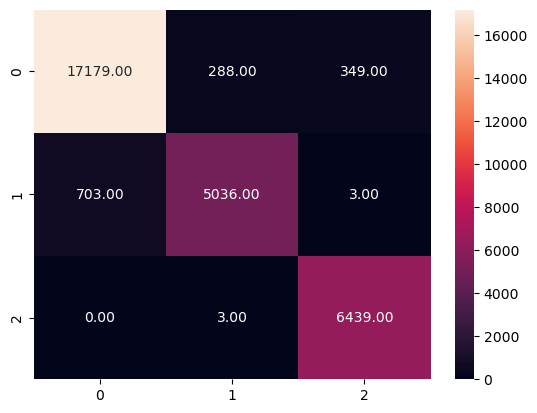

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(sns.heatmap(cm,annot=True,fmt=".2f"))

In [17]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [18]:
metric(y_test,y_pred)

Accuracy score: 0.9679666666666666
Confusion matrix: [[17392   399    25]
 [  498  5244     0]
 [   39     0  6403]]
Classification report:               precision    recall  f1-score   support

           0       0.97      0.98      0.97     17816
           1       0.93      0.91      0.92      5742
           2       1.00      0.99      1.00      6442

    accuracy                           0.97     30000
   macro avg       0.97      0.96      0.96     30000
weighted avg       0.97      0.97      0.97     30000



AxesSubplot(0.125,0.11;0.62x0.77)


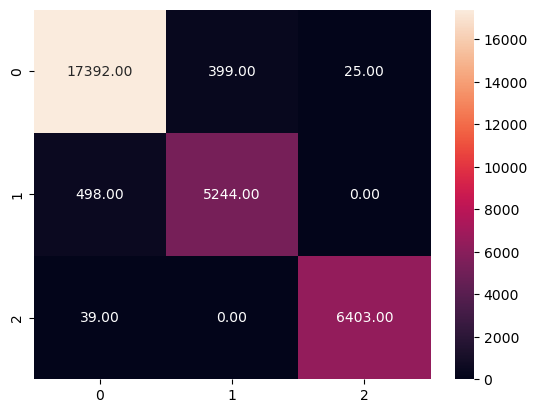

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(sns.heatmap(cm,annot=True,fmt=".2f"))

In [21]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [22]:
metric(y_test,y_pred)

Accuracy score: 0.9771
Confusion matrix: [[17586   185    45]
 [  452  5290     0]
 [    5     0  6437]]
Classification report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17816
           1       0.97      0.92      0.94      5742
           2       0.99      1.00      1.00      6442

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



AxesSubplot(0.125,0.11;0.62x0.77)


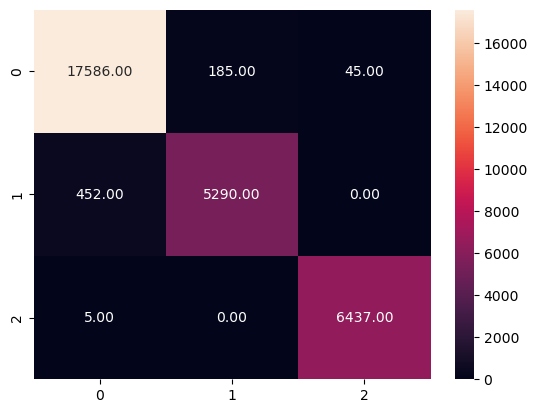

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(sns.heatmap(cm,annot=True,fmt=".2f"))

In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [25]:
metric(y_test,y_pred)

Accuracy score: 0.9772666666666666
Confusion matrix: [[17577   214    25]
 [  439  5303     0]
 [    4     0  6438]]
Classification report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     17816
           1       0.96      0.92      0.94      5742
           2       1.00      1.00      1.00      6442

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



AxesSubplot(0.125,0.11;0.62x0.77)


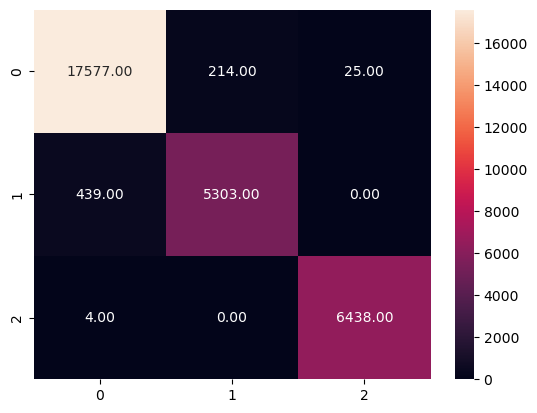

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(sns.heatmap(cm,annot=True,fmt=".2f"))

In [27]:
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [28]:
metric(y_test,y_pred)

Accuracy score: 0.9745666666666667
Confusion matrix: [[17585   209    22]
 [  521  5221     0]
 [   11     0  6431]]
Classification report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17816
           1       0.96      0.91      0.93      5742
           2       1.00      1.00      1.00      6442

    accuracy                           0.97     30000
   macro avg       0.98      0.96      0.97     30000
weighted avg       0.97      0.97      0.97     30000



AxesSubplot(0.125,0.11;0.62x0.77)


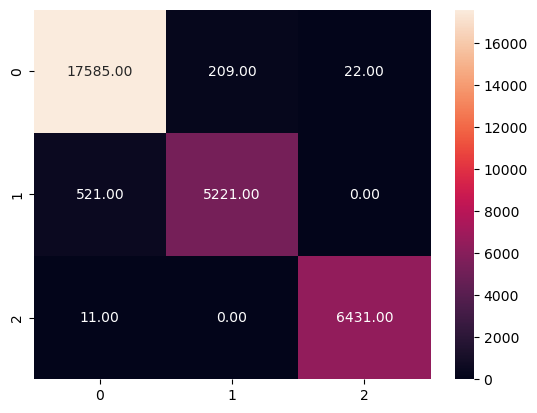

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(sns.heatmap(cm,annot=True,fmt=".2f"))